# Figures - body
---
### Load the SAMI dataset

In [1]:
%matplotlib widget

In [2]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn, fname_fn
from spaxelsleuth.plotting.plottools import bpt_colours, bpt_labels, bpt_ticks
from spaxelsleuth.plotting.plottools import morph_labels, morph_ticks
from spaxelsleuth.plotting.plottools import ncomponents_labels, ncomponents_colours
from spaxelsleuth.plotting.plottools import component_labels, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter, plot2dcontours

import matplotlib
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [3]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/paper/"
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"
eline_SNR_min = 3       # Minimum S/N of emission lines to accept


In [4]:
# Load the sample
df = load_sami_galaxies(ncomponents=ncomponents,
                        bin_type=bin_type,
                        eline_SNR_min=eline_SNR_min, 
                        vgrad_cut=False,
                        correct_extinction=False,
                        sigma_gas_SNR_cut=True)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [4]:
# Make a separate DataFrame only containing star-forming spaxels
df_SF = df.copy()
df_SF = df_SF[df_SF["BPT (total)"] == "SF"]

# Make separate DataFrames containing spaxels with 1, 2 or 3 spaxels
df_1only = df.copy()
df_2only = df.copy()
df_3only = df.copy()
df_1only = df_1only[df_1only["Number of components"] == 1]
df_2only = df_2only[df_2only["Number of components"] == 2]
df_3only = df_3only[df_3only["Number of components"] == 3]

df_SF_1only = df_SF.copy()
df_SF_2only = df_SF.copy()
df_SF_3only = df_SF.copy()
df_SF_1only = df_SF_1only[df_SF_1only["Number of components"] == 1]
df_SF_2only = df_SF_2only[df_SF_2only["Number of components"] == 2]
df_SF_3only = df_SF_3only[df_SF_3only["Number of components"] == 3]


In [5]:
###############################################################################
# Print: number of spaxels in each spectral category
###############################################################################
pd.set_option('display.float_format', lambda x: '%.2f' % x)

for bpt in bpt_labels:
    print(f"{bpt}: N = {df[df['BPT (total)'] == bpt].shape[0]} ({df[df['BPT (total)'] == bpt].shape[0] / df.shape[0] * 100}%)")

Not classified: N = 1583815 (86.06965174129353%)
SF: N = 217315 (11.809602995399844%)
Composite: N = 17276 (0.938833956922107%)
LINER: N = 3584 (0.1947662017601778%)
Seyfert: N = 2234 (0.12140281661055727%)
Ambiguous: N = 15931 (0.8657422880137815%)


In [6]:
###############################################################################
# Print: statistics for each quantity
###############################################################################
for col_x in ["HALPHA EW", "sigma_gas", "sigma_gas - sigma_*", "sigma_gas/sigma_*"]:
    print(df[[f"{col_x} (component {ii})" for ii in range(3)]].describe())


       HALPHA EW (component 0)  HALPHA EW (component 1)  \
count                680271.00                 51440.00   
mean                     23.81                    13.01   
std                     928.77                    16.84   
min                       0.10                     0.37   
25%                       7.34                     4.90   
50%                      15.12                     8.52   
75%                      26.80                    15.23   
max                  762038.24                   602.55   

       HALPHA EW (component 2)  
count                  5074.00  
mean                      9.89  
std                      10.04  
min                       0.62  
25%                       3.92  
50%                       7.03  
75%                      12.27  
max                     172.05  
       sigma_gas (component 0)  sigma_gas (component 1)  \
count                680693.00                 51440.00   
mean                     44.23                   103.

# BPT diagrams

In [11]:
col_z_list = ["count", "BPT (numeric) (total)", "Number of components", "HALPHA EW (total)"]
col_y = "log O3 (total)"
fig, axs, caxs = plot_empty_BPT_diagram(colorbar=True, nrows=4, include_Law2021=True)
for rr, col_z in enumerate(col_z_list[:1]):
    print(3 * rr + 0)

    # Plot 2D histograms of the subset
    plot2dhistcontours(df, col_x="log N2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 0], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log S2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 1], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log O1 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 2], nbins=100, contours=True, colors="white", cax=caxs[rr], plot_colorbar=True)
    
    # Decorations
    [ax.set_ylabel("") for ax in axs[3 * rr + 1:3 * rr + 3]]
    [ax.set_yticklabels([]) for ax in axs[3 * rr + 1:3 * rr + 3]]
    if col_z == "count":
        [ax.get_children()[0].set_clim([10, 1e3]) for ax in axs[3 * rr + 1:3 * rr + 3]]

# Grid on
[ax.grid() for ax in axs]

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"BPT_quantities_{bin_type}_{ncomponents}"), bbox_inches="tight")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0


In [29]:
plt.close("all")

In [30]:
# Repeating the above, but plotting in separate figures for talks, etc.
rc("font",**{"family": "serif", "size": 14})

col_z_list = ["count", "BPT (numeric) (total)", "Number of components", "HALPHA EW (total)"]
col_y = "log O3 (total)"
for col_z in col_z_list:
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True)

    # Plot 2D histograms of the subset
    plot2dhistcontours(df, col_x="log N2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[0], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log S2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[1], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log O1 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[2], nbins=100, contours=True, colors="white", cax=cax, plot_colorbar=True)
    
    # Decorations
    [ax.set_ylabel("") for ax in axs[1:]]
    [ax.set_yticklabels([]) for ax in axs[1:]]
    if col_z == "count":
        [ax.get_children()[0].set_clim([10, 1e3]) for ax in axs[1:]]

    # Grid on
    [ax.grid() for ax in axs]
    
    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"BPT_SAMI_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
################################################################################
# BPT diagrams (each spectral category shown separately)
################################################################################
col_z = "count"

#///////////////////////////////////////////////////////////////////////////////
# BPT - based on TOTAL fluxes
for cat in bpt_labels:
    df_cat = df[df["BPT (total)"] == cat]
    if df_cat.shape[0] == 0:
        continue
    col_y = "log O3 (total)"
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True)
    
    # Plot 2D histograms of the subset
    plot2dhistcontours(df_cat, col_x="log N2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[0], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df_cat, col_x="log S2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[1], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df_cat, col_x="log O1 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[2], nbins=100, contours=True, colors="white", cax=cax, plot_colorbar=True)

    # Decorations
    axs[1].set_title(cat)
    [ax.set_ylabel("") for ax in axs[1:]]

    # Grid on
    [ax.grid() for ax in axs]
    
    # Save 
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"BPT_SAMI_indv_{cat.replace(' ', '_')}_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


# WHAN diagrams

In [35]:
col_x = "log N2"
col_y = "log HALPHA EW"

In [36]:
###############################################################################
# WHAV diagram, each component shown separately (counts)
###############################################################################
col_z_list = ["count", "BPT (numeric) (total)"]
for col_z in col_z_list:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, bbox.width * 0.1, bbox.height])

    plot2dhistcontours(df, col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)",
                       col_z=col_z, log_z=True if col_z == "count" else False,
                       alpha=1.0, ax=ax, cax=cax, nbins=nbins,
                       linewidths=0.5,
                       contours=True, hist=True, colors="white",
                       vmin=1 if col_z == "count" else None,
                       vmax=1e3 if col_z == "count" else None,
                       plot_colorbar=True if ii == 3 - 1 else False)
    # Decorations
    ax.grid()

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"WHAN_SAMI_individual_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
###############################################################################
# WHAV diagram (hist) - global properties (in separate figures for talks etc.)
###############################################################################
col_z_list = ["Morphology (numeric)", "log M_*", "R_e (kpc)"]
for col_z in col_z_list:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, bbox.width * 0.1, bbox.height])

    plot2dhistcontours(df, col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)",
                       col_z=col_z, log_z=True if col_z == "count" else False,
                       alpha=1.0, ax=ax, cax=cax, nbins=nbins,
                       linewidths=0.5,
                       contours=True, hist=True, colors="white",
                       vmin=1 if col_z == "count" else None,
                       vmax=1e3 if col_z == "count" else None,
                       plot_colorbar=True if ii == 3 - 1 else False)
    # Decorations
    ax.grid()

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"WHAN_SAMI_individual_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# WHAV* diagrams

In [29]:
# Settings
col_x = "sigma_gas - sigma_*"
if col_x == "log sigma_gas":
    fig_fname_prefix = "WHAV"
elif col_x == "sigma_gas - sigma_*":
    fig_fname_prefix = "WHAV_star"
elif col_x == "sigma_gas/sigma_*":
    fig_fname_prefix = "WHAV_star_frac"
elif col_x == "sigma_gas^2 - sigma_*^2":
    fig_fname_prefix = "WHAV_star2_frac"
col_y = "log HALPHA EW"
nbins = 100

In [11]:
col_x = "v_gas - v_*"
col_y = "sigma_gas - sigma_*"

In [43]:
###############################################################################
# WHAV diagram, each component shown separately (counts)
###############################################################################
# col_z_list = ["count", "BPT (numeric) (total)", "v_gas - v_*"]
# col_z_list = ["v_gas - v_*"]
col_z_list = ["log SFR surface density (component 0)"]
for col_z in col_z_list:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, bbox.width * 0.1, bbox.height])

    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z, 
                           log_z=True if col_z == "count" else False,
                           alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                           linewidths=0.5,
                           contours=True, hist=True, colors="white",
                           cmap="coolwarm_r", vmin=-3, vmax=-1,
#                            vmin=1 if col_z == "count" else None,
#                            vmax=1e3 if col_z == "count" else None,
                           plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(f"Component {ii + 1}")

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"WHAV_SAMI_individual_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
###############################################################################
# WHAV diagram (hist) - global properties (in separate figures for talks etc.)
###############################################################################
col_z_list = ["Morphology (numeric)", "log M_*", "R_e (kpc)"]
for col_z in col_z_list: 
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="black",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(f"Component {ii + 1}")

    if savefigs:
        fig.savefig(os.path.join(fig_path, f"WHAV_SAMI_individual_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")

    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
###############################################################################
# WHAV diagram (hist) - global properties (all in same figure)
###############################################################################
col_z_list = ["Morphology (numeric)", "log M_*", "R_e (kpc)"]

fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="black",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
        axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None

#         if rr == len(col_z_list) - 1:
#             for ax in axs[:-1]:
#                 ax.set_xticks(ax.get_xticks()[:-2])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_global_properties"), bbox_inches="tight")
    

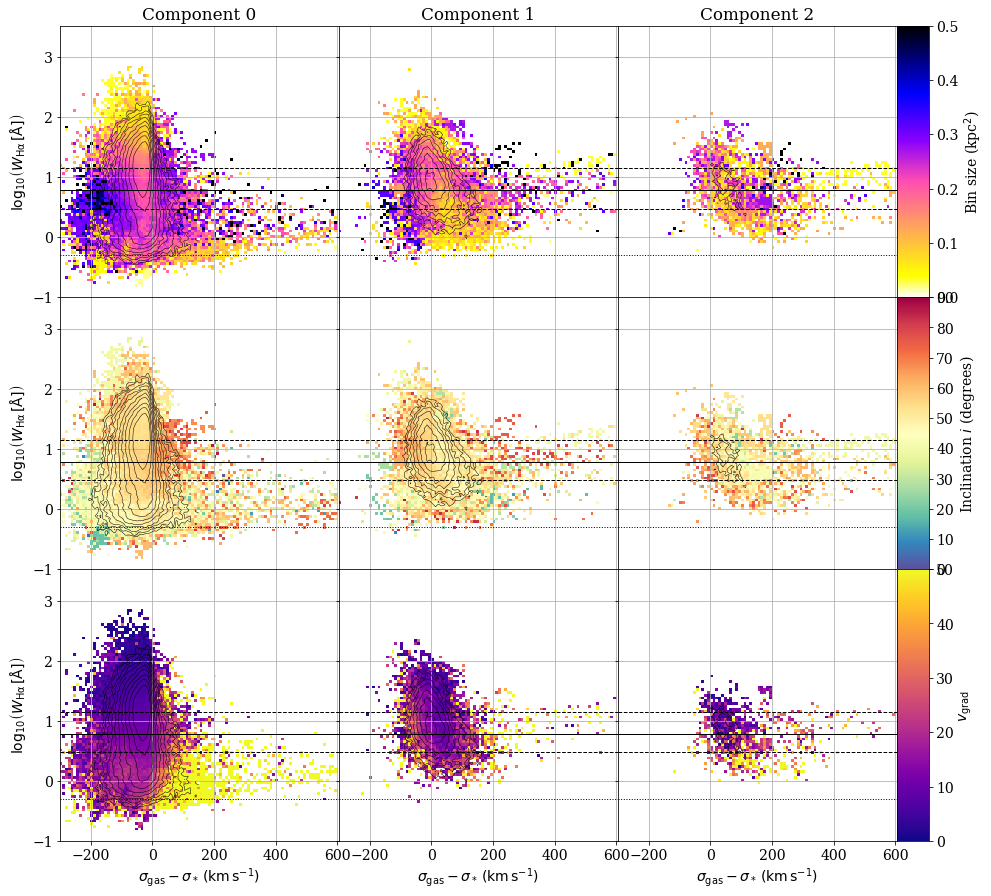

In [13]:
###############################################################################
# WHAV diagram (hist) - systematic (observational) properties
###############################################################################
col_z_list = ["Bin size (square kpc)", "Inclination i (degrees)", "v_grad"]

fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="black",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
        axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None

#         if rr == len(col_z_list) - 1:
#             for ax in axs[:-1]:
#                 ax.set_xticks(ax.get_xticks()[:-2])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_systematics"), bbox_inches="tight")

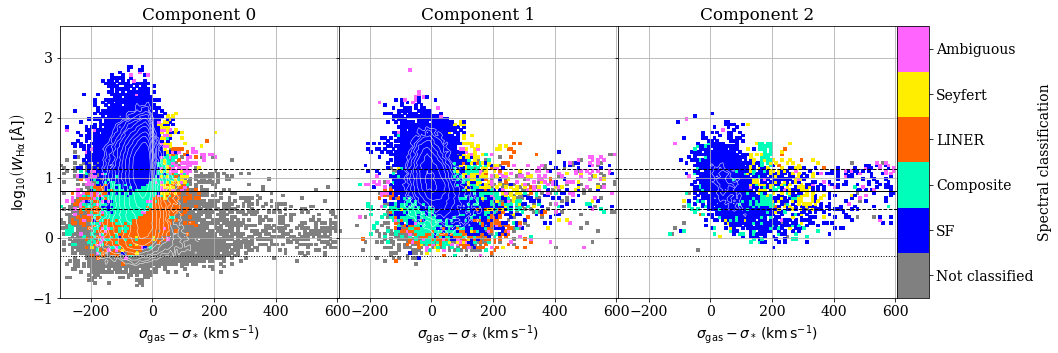

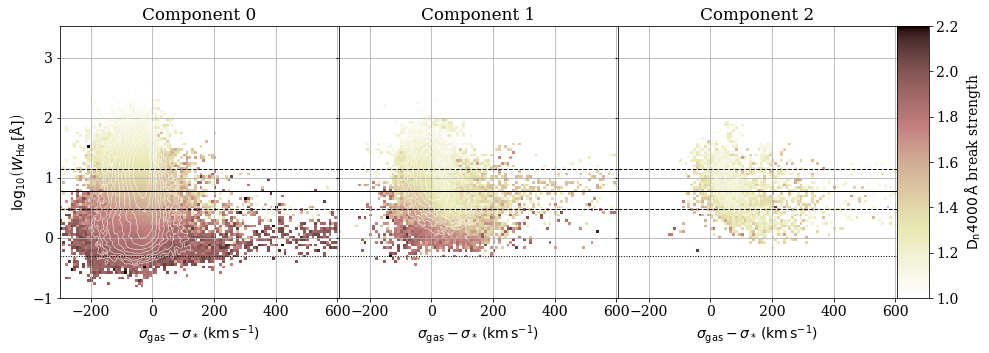

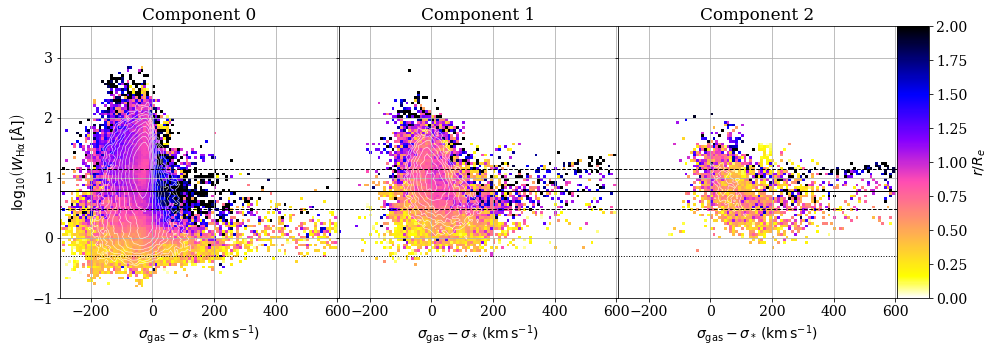

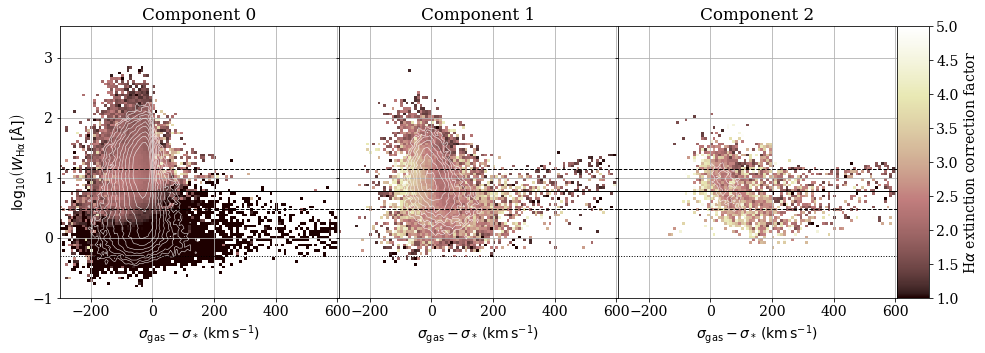

In [15]:
###############################################################################
# WHAV diagram (hist) - local properties (in separate figures for talks etc.)
###############################################################################
col_z_list = ["BPT (numeric) (total)", "D4000", "r/R_e", "HALPHA extinction correction"]

if savefigs:
    pp = PdfPages(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_local_properties_multi-page.pdf"))

for col_z in col_z_list: 
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="white",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(component_labels[ii])

    if savefigs:
        pp.savefig(fig, bbox_inches="tight")

# Save
if savefigs:
    pp.close()

In [ ]:
###############################################################################
# WHAV diagram (hist) - local properties
###############################################################################
col_z_list = ["BPT (numeric) (total)", "D4000", "r/R_e", "HALPHA extinction correction"]

fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="white",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
        axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None

#         if rr == len(col_z_list) - 1:
#             for ax in axs[:-1]:
#                 ax.set_xticks(ax.get_xticks()[:-2])
# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_local_properties"), bbox_inches="tight")

In [ ]:
###############################################################################
# WHAV diagram (hist) - line ratios
###############################################################################
col_z_list = ["log S2 (total)", "log N2 (total)", "log O3 (total)", "N2O2 (total)"]
vmax_list = [0.0, 0.0, -0.5, vmax_fn("N2O2")]  # Use custom vmax values to bring out faint features

fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5, vmax=vmax_list[rr],
                              contours=True, hist=True, colors="white",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
        axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None

#         if rr == len(col_z_list) - 1:
#             for ax in axs[:-1]:
#                 ax.set_xticks(ax.get_xticks()[:-2])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_line_ratios"), bbox_inches="tight")

In [ ]:
###############################################################################
# WHAV diagram (hist) - SFR
###############################################################################
col_z_list = ["log SFR", "log SFR surface density"]

fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z,
                              alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                              linewidths=0.5,
                              contours=True, hist=True, colors="white",
                              plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
        axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None

#         if rr == len(col_z_list) - 1:
#             for ax in axs[:-1]:
#                 ax.set_xticks(ax.get_xticks()[:-2])
# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_SFR"), bbox_inches="tight")

### WHAV and WHAV* diagrams for 1, 2 and 3-component spaxels

In [ ]:
###############################################################################
# WHAV diagram (counts), but each component shown separately
# 3 components
###############################################################################
col_y = "log HALPHA EW"
for col_x in ["log sigma_gas", "sigma_gas - sigma_*"]:
    for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
        fig, axs = plt.subplots(nrows=1, ncols=nn + 1, figsize=(5 * (nn + 1), 5))
        axs = [axs] if nn == 0 else axs
        fig.subplots_adjust(wspace=0)
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.09 / (nn + 1), bbox.height])

        # recom components
        for ii in range(nn + 1):
            plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                               col_y=f"{col_y} (component {ii})",
                               col_z="count", log_z=True,
                               alpha=1.0, ax=axs[ii], cax=cax, nbins=50,
                               linewidths=0.5,
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True if ii == nn else False)
            # Decorations
            axs[ii].grid()
            axs[ii].axvline(0, linestyle="--", color="k") if col_x == "sigma_gas - sigma_*" else None
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_title(f"Component {ii}")
            # Adjust the axis scaling
            axs[ii].get_children()[0].set_clim(1, 1e3)
        cax.set_ylabel(r"$N$")
            
        for ax in axs[:-1]:
            ax.set_xticks(ax.get_xticks()[:-2])

        # Save
        if savefigs:
            fig.savefig(os.path.join(fig_path, f"WHAV_{nn + 1}_component{'s' if nn > 0 else ''}_{bin_type}_{ncomponents}_individual"))


### WHAV* diagrams, each BPT classification shown separately
Need to represent on a non-log scale...

In [ ]:
    ###############################################################################
    # WHAV diagram (hist) - BPT classifications
    ###############################################################################
    col_z = "count"
    col_x = "sigma_gas - sigma_*"
    col_y = "log HALPHA EW"
    
    fig, axs_all = plt.subplots(nrows=len(bpt_labels[1:]), ncols=3, figsize=(5 * 3, 5 * len(bpt_labels[1:])), sharex=True)
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, bpt) in enumerate(zip(axs_all, bpt_labels[1:])): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        df_subset = df[df["BPT (total)"] == bpt]
        # recom components
        for ii in range(3):
            plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=col_z, log_z=False,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=20, xmin=-300, xmax=300,
                                  linewidths=0.5, levels=np.logspace(0, 4, 20),
                                  contours=True, hist=False, colors="black",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].get_children()[0].set_clim([1, 1e3]) if col_z == "count" else None
            axs[ii].grid()
            axs[ii].axvline(0, linestyle="--", color="k") if col_x == "sigma_gas - sigma_*" else None
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(bpt_labels[1:]) - 2 else None
            axs[ii].set_xticklabels([]) if rr < len(bpt_labels[1:]) - 2 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None
        axs[0].text(s=bpt, x=0.1, y=0.9, horizontalalignment="left", transform=axs[0].transAxes)

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_BPT"), bbox_inches="tight")


In [ ]:
###############################################################################
# WHAV diagram (scatter) - BPT classifications
###############################################################################
col_z = "count"
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

fig, axs_all = plt.subplots(nrows=len(bpt_labels[1:]), ncols=3, figsize=(5 * 3, 4 * len(bpt_labels[1:])), sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)
xmax_list = [250, 600, 600]

for rr, (axs, bpt) in enumerate(zip(axs_all, bpt_labels[1:])): 
    df_subset = df[df["BPT (total)"] == bpt]
    # recom components
    for ii in range(3):
        cond = df["BPT (total)"] == bpt
        cond &= ~np.isnan(df[f"{col_x} (component {ii})"]) & ~np.isnan(df[f"{col_y} (component {ii})"])
        df_subset = df[cond]
        plot2dscatter(df_subset, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=None, errorbars=False,
                              alpha=0.25, ax=axs[ii],
                              xmin=-300, xmax=xmax_list[ii],
                              markersize=6, markerfacecolour=bpt_colours[rr + 1] / 1.5, edgecolors="none", zorder=1,
                              plot_colorbar=False)
        points = axs[ii].collections[0]
        points.set_rasterized(True)
        plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                              col_y=f"{col_y} (component {ii})",
                              col_z=col_z, log_z=False,
                              alpha=1.0, ax=axs[ii], nbins=50, xmin=-300, xmax=xmax_list[ii],
                              linewidths=1, levels=np.logspace(1, 3, 10),
                              contours=True, hist=False, colors="white",
                              plot_colorbar=False)
        # Decorations
        axs[ii].grid()
        axs[ii].axvline(0, linestyle="--", color="lightgrey") if col_x == "sigma_gas - sigma_*" else None
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(bpt_labels[1:]) - 2 else None
#             axs[ii].set_xticklabels([]) if rr < len(bpt_labels[1:]) - 2 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None
        axs[ii].text(s=f"{bpt} (N = {df_subset.shape[0]})", x=0.1, y=0.9, horizontalalignment="left", transform=axs[ii].transAxes)

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"WHAV_star_{bin_type}_{ncomponents}_individual_BPT"), bbox_inches="tight")


In [ ]:
################################################################################
# WHAV* diagrams (each spectral category shown separately)
################################################################################
col_z = "count"

#///////////////////////////////////////////////////////////////////////////////
# BPT - based on TOTAL fluxes
for cat in bpt_labels:
    df_cat = df[df["BPT (total)"] == cat]
    if df_cat.shape[0] == 0:
        continue
    col_y = "log O3 (total)"
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True)
    
    # Plot 2D histograms of the subset
    plot2dhistcontours(df_cat, col_x="log N2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[0], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df_cat, col_x="log S2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[1], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df_cat, col_x="log O1 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, vmin=1, vmax=1e3, ax=axs[2], nbins=100, contours=True, colors="white", cax=cax, plot_colorbar=True)

    # Decorations
    axs[1].set_title(cat)
    [ax.set_ylabel("") for ax in axs[1:]]

    # Grid on
    [ax.grid() for ax in axs]
    
    # Save 
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"BPT_SAMI_indv_{cat.replace(' ', '_')}_{fname_fn(col_z)}.pdf"), bbox_inches="tight", format="pdf")
        

In [ ]:
bpt_colours

In [ ]:
###########################################################################################################
# Plot contours in the WHAV* for each spectral class
###########################################################################################################
import seaborn as sns
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

fig, axs_all = plt.subplots(nrows=len(bpt_labels[1:]), ncols=3, figsize=(5 * 3, 5 * len(bpt_labels[1:])), sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)

for rr, (axs, bpt) in enumerate(zip(axs_all, bpt_labels[1:])): 
    df_subset = df[df["BPT (total)"] == bpt]
    # recom components
    for ii in range(3):
        cond = ~np.isnan(df_subset[f"{col_x} (component {ii})"]) & ~np.isnan(df_subset[f"{col_y} (component {ii})"])
        data_x = df_subset.loc[cond, f"{col_x} (component {ii})"]
        data_y = df_subset.loc[cond, f"{col_y} (component {ii})"]
        sns.kdeplot(data=data_x, data2=data_y, ax=axs[ii],
        clip=((vmin_fn(col_x), 600), (vmin_fn(col_y), vmax_fn(col_y))))
        
        # Decorations
        axs[ii].grid()
        axs[ii].axvline(0, linestyle="--", color="lightgrey") if col_x == "sigma_gas - sigma_*" else None
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_xlabel("") if rr < len(bpt_labels[1:]) - 2 else None
        axs[ii].set_title(component_labels[ii]) if rr == 0 else None
        axs[ii].set_xlim([vmin_fn(col_x), 600])
        axs[ii].set_ylim([vmin_fn(col_y), vmax_fn(col_y)])
        axs[ii].text(s=f"{bpt} (N = {len(data_x)})", x=0.1, y=0.9, horizontalalignment="left", transform=axs[ii].transAxes)
        
        # Classification lines of Lacerda+2017
        axs[ii].axhline(np.log10(3), linestyle="--", linewidth=1, color="k")
        axs[ii].axhline(np.log10(14), linestyle="--", linewidth=1, color="k")
        # Classification lines of Cid Fernandes+2011
        axs[ii].axhline(np.log10(0.5), linestyle=":", linewidth=1, color="k")  # "Passive" galaxies

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"WHAV_star_KDE_{bin_type}_{ncomponents}_individual_BPT"), bbox_inches="tight")


### Histograms showing the distribution in H$\alpha$ EW and $\sigma_{gas} - \sigma_*$ in each BPT class

In [ ]:
from IPython.core.debugger import Tracer

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.subplots_adjust(wspace=0)

for bb, bpt in enumerate(bpt_labels):
    df_subset = df[df["BPT (total)"] == bpt]
    for ii in range(3):
        axs[ii].hist(df_subset[f"log HALPHA EW (component {ii})"],
             bins=50, density=True,
             range=(vmin_fn("log HALPHA EW"), vmax_fn("log HALPHA EW")),
             histtype="step", color=bpt_colours[bb], label=f"{bpt} ($N = {df_subset.shape[0]}$)")
        
        axs[ii].set_xlabel(label_fn(f"log HALPHA EW") + f" (component {ii})")

axs[0].set_ylabel(r"$N$ (normalised)")
[ax.set_yticklabels([]) for ax in axs[1:]]
axs[-1].legend()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.subplots_adjust(wspace=0)

for bb, bpt in enumerate(bpt_labels):
    df_subset = df[df["BPT (total)"] == bpt]
    for ii in range(3):
        axs[ii].hist(df_subset[f"sigma_gas - sigma_* (component {ii})"],
             bins=50, density=True,
             range=(vmin_fn("sigma_gas - sigma_*"), vmax_fn("sigma_gas - sigma_*")),
             histtype="step", color=bpt_colours[bb], label=f"{bpt} ($N = {df_subset.shape[0]}$)")
        
        axs[ii].set_xlabel(label_fn(f"sigma_gas - sigma_*") + f" (component {ii})")
axs[0].set_ylabel(r"$N$ (normalised)")
[ax.set_yticklabels([]) for ax in axs[1:]]
axs[-1].legend()

### a WHAV* diagram made from all data, but represented as a scatter plot coloured by BPT classification

In [ ]:
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
col_z = "BPT (numeric) (total)"

for ii in range(3):
    plot2dscatter(df, col_x=f"{col_x} (component {ii})",
                  col_y=f"{col_y} (component {ii})",
                  col_z=col_z, 
                  markersize=1.5, edgecolors="none", errorbars=False,
                  ax=axs[ii], cax=cax,
                  plot_colorbar=True if ii == 2 else False,)

# Bar plots

**Fig. 2**: bar plot showing % of spaxels w/ 1, 2 or 3 components, broken down by spectral classification

**Fig. 3**: bar plot showing % of spaxels w/ 1, 2 or 3 components, broken down by host galaxy morphology

In [ ]:
###############################################################################
# Stacked bar chart: # of fitted components by spectral classification
###############################################################################
counts_0 = []
counts_1 = []
counts_2 = []
counts_3 = []
for bpt in bpt_labels:
    cond = df["BPT (total)"] == bpt
    cond_0 = cond & (df["Number of components"] == 0)
    cond_1 = cond & (df["Number of components"] == 1)
    cond_2 = cond & (df["Number of components"] == 2)
    cond_3 = cond & (df["Number of components"] == 3)
    counts_0.append(df[cond_0].shape[0] / df[cond].shape[0] * 100)
    counts_1.append(df[cond_1].shape[0] / df[cond].shape[0] * 100)
    counts_2.append(df[cond_2].shape[0] / df[cond].shape[0] * 100)
    counts_3.append(df[cond_3].shape[0] / df[cond].shape[0] * 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
ax.bar(bpt_labels, counts_0, width=0.6, label=ncomponents_labels[0] + " components", color=ncomponents_colours[0])
ax.bar(bpt_labels, counts_1, width=0.6, bottom=counts_0, label=ncomponents_labels[1] + " component", color=ncomponents_colours[1])
ax.bar(bpt_labels, counts_2, width=0.6, bottom=np.array(counts_0) + np.array(counts_1), label=ncomponents_labels[2] + " components", color=ncomponents_colours[2])
ax.bar(bpt_labels, counts_3, width=0.6, bottom=np.array(counts_0) + np.array(counts_1) + np.array(counts_2), label=ncomponents_labels[3] + " components", color=ncomponents_colours[3])
ax.grid()
ax.set_ylim([0, 105])
ax.set_ylabel("Percentage")
ax.set_xlabel("Spectral classification")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize="small")
plt.xticks(rotation=90)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"bar_ncomponents_by_spectral_class_{bin_type}_{ncomponents}"), bbox_inches="tight")

In [ ]:
###############################################################################
# Stacked bar chart: # of fitted components by morphology
###############################################################################
# counts_0 = []
counts_1 = []
counts_2 = []
counts_3 = []
for morph in morph_labels:
    cond = df["Morphology"] == morph
    cond &= df["Number of components"] > 0
#     cond_0 = cond & (df["Number of components"] == 0)
    cond_1 = cond & (df["Number of components"] == 1)
    cond_2 = cond & (df["Number of components"] == 2)
    cond_3 = cond & (df["Number of components"] == 3)
#     counts_0.append(df[cond_0].shape[0] / df[cond].shape[0] * 100)
    counts_1.append(df[cond_1].shape[0] / df[cond].shape[0] * 100)
    counts_2.append(df[cond_2].shape[0] / df[cond].shape[0] * 100)
    counts_3.append(df[cond_3].shape[0] / df[cond].shape[0] * 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
# ax.bar(morph_labels, counts_0, width=0.6, label=ncomponents_labels[0] + " components", color=ncomponents_colours[0])
ax.bar(morph_labels, counts_1, width=0.6, label=ncomponents_labels[1] + " component", color=ncomponents_colours[1])
ax.bar(morph_labels, counts_2, width=0.6, bottom=np.array(counts_1), label=ncomponents_labels[2] + " components", color=ncomponents_colours[2])
ax.bar(morph_labels, counts_3, width=0.6, bottom=np.array(counts_1) + np.array(counts_2), label=ncomponents_labels[3] + " components", color=ncomponents_colours[3])
ax.grid()
ax.set_ylim([0, 105])
ax.set_ylabel("Percentage")
ax.set_xlabel("Morphology")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize="small")
plt.xticks(rotation=90)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"bar_ncomponents_by_morphology_{bin_type}_{ncomponents}"), bbox_inches="tight")

# Histograms showing the distribution in H$\alpha$ EW, $\sigma_{\rm gas}$, $\sigma_{\rm gas} - \sigma_*$ and $\sigma_{\rm gas}/\sigma_*$

In [ ]:
###############################################################################
# Histograms showing the distribution in the above quantities for spaxels
# with 1, 2 or 3 fitted copmonents
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
fig.subplots_adjust(wspace=0)

for ax, col_x in zip(axs, ["log HALPHA EW", "sigma_gas", "sigma_gas - sigma_*", "sigma_gas/sigma_*"]):
    
    # Show the distribution of the total EW in each spaxel
    if col_x == "log HALPHA EW":
        ax.hist(df[f"{col_x} (total)"], histtype="bar",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color="grey",
                density=True, alpha=0.2, label=f"Total " + r"($N = %d$)" % df[f"{col_x} (total)"].count())
        ax.axvline(np.log10(3), linestyle="--", color="k", linewidth=0.5)
        ax.axvline(np.log10(14), linestyle="--", color="k", linewidth=0.5)
   
   # Show the distribution of each kinematic component separately
    for ii in range(3):
        ax.hist(df[f"{col_x} (component {ii})"], histtype="step",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color=component_colours[ii],
                density=True, label=component_labels[ii] + r" ($N = %d$)" % df[f"{col_x} (component {ii})"].count())
    
    # Decorations
    ax.set_xlabel(label_fn(col_x))
    ax.set_ylabel(r"$N$ (normalised)") if ax == axs[0] else None
    ax.set_yticklabels([])
    ax.legend(loc="upper right", fontsize="x-small") if ax == axs[-1] else None
    ax.autoscale(enable=True, axis="x", tight=True)
    ax.axvline(0, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas - sigma_*" else None
    ax.axvline(1, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas/sigma_*" else None

# [ax.set_xticklabels(ax.get_xticklabels()[:-1]) for ax in axs[1:-1]]
    
# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_Halpha_EW_and_kinematics_{bin_type}_{ncomponents}"), bbox_inches="tight")


# Same as above, but for star-forming spaxels only

In [ ]:
###############################################################################
# Histograms showing the distribution in the above quantities for spaxels
# with 1, 2 or 3 fitted copmonents
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
fig.subplots_adjust(wspace=0)

for ax, col_x in zip(axs, ["log HALPHA EW", "sigma_gas", "sigma_gas - sigma_*", "sigma_gas/sigma_*"]):
    
    # Show the distribution of the total EW in each spaxel
    if col_x == "log HALPHA EW":
        ax.hist(df_SF[f"{col_x} (total)"], histtype="bar",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color="grey",
                density=True, alpha=0.2, label=f"Total (SF only)" + r"($N = %d$)" % df_SF[f"{col_x} (total)"].count())
        ax.hist(df[f"{col_x} (total)"], histtype="bar",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color="grey",
                density=True, alpha=0.05, label=f"Total " + r"($N = %d$)" % df[f"{col_x} (total)"].count())
        ax.axvline(np.log10(3), linestyle="--", color="k", linewidth=0.5)
        ax.axvline(np.log10(14), linestyle="--", color="k", linewidth=0.5)
   
   # Show the distribution of each kinematic component separately
    for ii in range(3):
        ax.hist(df_SF[f"{col_x} (component {ii})"], histtype="step", alpha=1.0,
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color=component_colours[ii],
                density=True, label=component_labels[ii] + r"(SF only) ($N = %d$)" % df_SF[f"{col_x} (component {ii})"].count())
        ax.hist(df[f"{col_x} (component {ii})"], histtype="step", alpha=0.2,
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color=component_colours[ii],
                density=True, label=component_labels[ii] + r" ($N = %d$)" % df[f"{col_x} (component {ii})"].count())
    
    
    # Decorations
    ax.set_xlabel(label_fn(col_x))
    ax.set_ylabel(r"$N$ (normalised)") if ax == axs[0] else None
    ax.set_yticklabels([])
    ax.legend(loc="upper right", fontsize="x-small") if ax == axs[-1] else None
    ax.autoscale(enable=True, axis="x", tight=True)
    ax.axvline(0, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas - sigma_*" else None
    ax.axvline(1, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas/sigma_*" else None

# [ax.set_xticklabels(ax.get_xticklabels()[:-1]) for ax in axs[1:-1]]
    
# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_Halpha_EW_and_kinematics_{bin_type}_{ncomponents}"), bbox_inches="tight")


# Is it DIG?

### Histogram showing $\sigma_{\rm gas, 1} - \sigma_{\rm gas, 0}$ for components 1 and 3

In [ ]:
###############################################################################
# Make a copy of the DataFrame where v_grad cut has been made
###############################################################################
df_cut = df_SF.copy()
df_nocut = df_SF.copy()

for ii in range(3 if ncomponents == "recom" else 1):
    cond_bad_gaskin = df_cut[f"sigma_gas (component {ii})"] < 2 * df_cut[f"v_grad (component {ii})"]
    df_cut.loc[cond_bad_gaskin] = np.nan

# Also, NaN out rows where EVERY v_grad component is NaN.
cond_NaN_vgrad = None
for ii in range(3 if ncomponents == "recom" else 1):
    if cond_NaN_vgrad is None:
        cond_NaN_vgrad = np.isnan(df_cut[f"v_grad (component {ii})"])
    else:
        cond_NaN_vgrad &= np.isnan(df_cut[f"v_grad (component {ii})"])
df_cut.loc[cond_NaN_vgrad] = np.nan

###############################################################################
# Make v_grad and inclination cuts to minimise the impact of beam smearing
###############################################################################
# Inclination cut
df_cut = df_cut[df_cut["Inclination i (degrees)"] < 30]
df_nocut = df_nocut[df_nocut["Inclination i (degrees)"] < 30]

df_cut_2only = df_cut.copy()
df_cut_3only = df_cut.copy()
df_cut_2only = df_cut_2only[df_cut_2only["Number of components"] == 2]
df_cut_3only = df_cut_3only[df_cut_3only["Number of components"] == 3]

df_nocut_2only = df_nocut.copy()
df_nocut_3only = df_nocut.copy()
df_nocut_2only = df_nocut_2only[df_nocut_2only["Number of components"] == 2]
df_nocut_3only = df_nocut_3only[df_nocut_3only["Number of components"] == 3]

In [ ]:
###############################################################################
# Histogram: Delta sigma_gas for components 1 and 2
###############################################################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
fig.subplots_adjust(wspace=0.0)

col_x = "delta sigma_gas (1/0)"
ax.hist(df_cut_2only[col_x], range=(0, 200), density=False, bins=50, alpha=1.0, color=ncomponents_colours[2], histtype="step", label="2-component spaxels")
ax.hist(df_cut_3only[col_x], range=(0, 200), density=False, bins=50, alpha=1.0, color=ncomponents_colours[3], histtype="step", label="3-component spaxels")
ax.hist(df_nocut_2only[col_x], range=(0, 200), density=False, bins=50, alpha=0.2, color=ncomponents_colours[2], histtype="step", label=r"2-component spaxels (no $v_{\rm grad}$ cut)")
ax.hist(df_nocut_3only[col_x], range=(0, 200), density=False, bins=50, alpha=0.2, color=ncomponents_colours[3], histtype="step", label=r"3-component spaxels (no $v_{\rm grad}$ cut)")
ax.set_xlabel(label_fn(col_x))

# Decorations
ax.set_title("Star-forming only")
ax.set_ylabel(r"$N$")   
ax.axvline(0, color="k", ls="--")
ax.legend(fontsize="x-small")
ax.set_xlim([0, 200])
ax.autoscale(enable=True, axis="x", tight=True)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"delta_sigma_gas_hist_SF_only_{bin_type}_{ncomponents}"), bbox_inches="tight")

# What about shocks associated with star formation?

### Histograms showing distribution in H$\alpha$ EW, $\sigma_{\rm gas}$, SFR and SFR surface density

In [ ]:
###############################################################################
# Histograms: sigma_gas (component 0), SFR (component 0), SFR surface density (component 0)
# for spaxels with 1, 2, 3 fitted components
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.subplots_adjust(wspace=0)

for cc, col_x in enumerate(["log HALPHA EW (component 0)", "sigma_gas (component 0)", "log SFR (component 0)", "log SFR surface density (component 0)"]):
    for ii in range(3):
        cond = df_SF["Number of components"] == ii + 1
        hist(df_SF.loc[cond, col_x], density=True, histtype="step",
             ax=axs[cc], range=(vmin_fn(col_x), 100 if col_x.startswith("sigma") else vmax_fn(col_x)),
             bins="scott",
             label=f"{ncomponents_labels[ii + 1]} component{'s' if ii + 1 > 1 else ''}" + r" ($N = %d$)" % (df_SF.loc[cond, col_x].shape[0]),
             color=ncomponents_colours[ii + 1])
    axs[cc].set_xlabel(label_fn(col_x) + " (component 0)")
    axs[cc].set_yticklabels([]) if ii > 0 else None
axs[0].axvline(np.log10(3), linestyle="--", color="k")
axs[0].legend(fontsize="x-small", loc="upper left")
axs[0].set_ylabel(r"$N$ (normalised)")
fig.suptitle("Star-forming spaxels only", y=0.94)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_HaEW_and_sigma_and_SFR_SF_only_{bin_type}_{ncomponents}"), bbox_inches="tight")


In [ ]:
###############################################################################
# Histograms: sigma_gas (component 0), SFR (component 0), SFR surface density (component 0)
# for spaxels with 1, 2, 3 fitted components
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.subplots_adjust(wspace=0)

for cc, col_x in enumerate(["log N2 (total)", "log S2 (total)", "log O1 (total)", "log O3 (total)"]):
    for ii in range(3):
        cond = df_SF["Number of components"] == ii + 1
        hist(df_SF.loc[cond, col_x], density=True, histtype="step",
             ax=axs[cc], range=(vmin_fn(col_x), 100 if col_x.startswith("sigma") else vmax_fn(col_x)),
             bins="scott",
             label=f"{ncomponents_labels[ii + 1]} component{'s' if ii + 1 > 1 else ''}" + r" ($N = %d$)" % (df_SF.loc[cond, col_x].shape[0]),
             color=ncomponents_colours[ii + 1])
    axs[cc].set_xlabel(label_fn(col_x) + " (component 0)")
    axs[cc].set_yticklabels([]) if ii > 0 else None
axs[0].legend(fontsize="x-small", loc="upper left")
axs[0].set_ylabel(r"$N$ (normalised)")
fig.suptitle("Star-forming spaxels only", y=0.94)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_line_ratios_SF_only_{bin_type}_{ncomponents}"), bbox_inches="tight")


# The effects of systematics: what systematic, local and global galaxy properties are correlated with the number of fitted components?
---
### Histograms showing H$\alpha$ S/N

In [ ]:
###############################################################################
# Blue, purple & green histogram: Total HALPHA S/N in spaxels divided into # 
# of components (log scale, not normalised)
###############################################################################
colors = ["dodgerblue", "forestgreen", "purple"]
labels = ["1 component fitted", "2 components fitted", "3 components fitted"]

fig, ax = plt.subplots(nrows=1, ncols=1)
# Show the distribution of each kinematic component separately
col_x = "HALPHA S/N (total)"
for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
    ax.hist(df_subset[f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color=ncomponents_colours[nn + 1],
            density=False, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())
ax.set_yscale("log")
ax.set_xlabel(label_fn(col_x) + " (total)")
ax.set_ylabel(r"$N$")
ax.autoscale(axis="x", enable=True, tight=True)
ax.legend(loc="upper right", fontsize="x-small")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_HALPHA_SNR_1vs2vs3components_{bin_type}_{ncomponents}"), bbox_inches="tight")

In [ ]:
###############################################################################
# Histogram: HALPHA S/N in spaxels divided into # of components AND BPT 
# classification
###############################################################################

for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    # Show the distribution of each kinematic component separately
    col_x = "HALPHA S/N (total)"
    ax.hist(df_subset[f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color="black",
            density=False, label="All classifications" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

    for cc, bpt in enumerate(bpt_labels):
        ax.hist(df_subset[df_subset["BPT (total)"] == bpt][f"{col_x}"], histtype="step",
                bins=50, range=(eline_SNR_min, 100), color=bpt_colours[cc],
                density=False, label=bpt + r" ($N = %d$)" % df_subset[df_subset["BPT (total)"] == bpt][f"{col_x}"].count())
    ax.set_yscale("log")
    ax.set_xlabel(label_fn(col_x) + " (total)")
    ax.set_ylabel(r"$N$")
    ax.autoscale(axis="x", enable=True, tight=True)
    ax.legend(loc="upper right", fontsize="x-small")
    ax.set_title(f"Component {nn}")

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"hist_HALPHA_SNR_component{nn}_{bin_type}_{ncomponents}"), bbox_inches="tight")

### 2D histograms showing D4000Å break strength vs. H$\alpha$ S/N, coloured by counts and H$\alpha$ EW: what is the stellar age distribution in low-S/N spaxels?

In [ ]:
###############################################################################
# Investigate the low-S/N regime: what are their properties?
###############################################################################
# Plot: Halpha S/N (total) vs. D4000 break strength
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="count", log_z=True, figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_{bin_type}_{ncomponents}"), bbox_inches="tight")

# Plot: Halpha S/N (total) vs. D4000 break strength - coloured by median BPT classification
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="BPT (numeric) (total)", figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_BPT_{bin_type}_{ncomponents}"), bbox_inches="tight")

# Plot: Halpha S/N (total) vs. D4000 break strength - coloured by median HALPHA EW
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="HALPHA EW (total)", figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])
fig.get_axes()[1].set_ylabel(fig.get_axes()[1].get_ylabel() + r" (total)")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_Halpha_EW_{bin_type}_{ncomponents}"), bbox_inches="tight")


### Investigating the properties of high S/N LINERs: how many kinematic components do these spaxels tend to have?

In [ ]:
###############################################################################
# Investigating high-S/N LINERs with low EWs: 
# how many kinematic components are fitted?
###############################################################################
cond_highSN_LINER = df["BPT (total)"] == "LINER"
cond_highSN_LINER &= df["HALPHA EW (total)"] < 3
cond_highSN_LINER &= df["HALPHA S/N (total)"] > 20
cond_highSN_LINER &= df["D4000"] > 1.6
cond_highSN_LINER &= df["Number of components"] > 0

df_highSN_LINERs = df[cond_highSN_LINER]

# Look at statistics
df["Number of components"].describe()
df_highSN_LINERs["Number of components"].describe()

colors = ["dodgerblue", "forestgreen", "purple"]
labels = ["1 component fitted", "2 components fitted", "3 components fitted"]

# Show the distribution of each kinematic component separately
fig, ax = plt.subplots(nrows=1, ncols=1)
col_x = "HALPHA S/N (total)"
for nn in range(3 if ncomponents == "recom" else 1):
    ax.hist(df_highSN_LINERs[df_highSN_LINERs["Number of components"] == nn + 1][f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color=ncomponents_colours[nn + 1],
            density=False, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_highSN_LINERs[df_highSN_LINERs["Number of components"] == nn + 1][f"{col_x}"].count())
ax.set_yscale("log")
ax.set_xlabel(label_fn(col_x) + " (total)")
ax.set_ylabel(r"$N$")
ax.set_title("High-S/N LINERs")
ax.autoscale(axis="x", enable=True, tight=True)
ax.legend(loc="upper right", fontsize="x-small")


### Histograms showing the distribution in various systematic, local and global galaxy properties for components with 1, 2 and 3 spaxels

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0.3)
bins = 50

for rr, col_x_list in enumerate([["Bin size (square kpc)", "z_spec", "Inclination i (degrees)", "log M_*"],
                                 ["R_e (kpc)", "log(M/R_e)", "D4000", "r/R_e"], 
                                 ["log HALPHA EW (total)", "log N2 (total)", "log S2 (total)", "log O1 (total)"],
                                 ["log O3 (total)", "N2O2 (total)", "log SFR (component 0)", "log SFR surface density (component 0)"]]):
    
    # Plot each quantity
    for ax, col_x in zip(axs[rr], col_x_list):
        ax.hist(df[f"{col_x}"],
                bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color="lightgrey", alpha=0.5,
                density=True, label=f"Full sample ($N = %d$)" % df[f"{col_x}"].count())

        # Show the distribution of each kinematic component separately
        for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
            ax.hist(df_subset[f"{col_x}"], histtype="step",
                    bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color=ncomponents_colours[nn + 1],
                    density=True, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

        # Decorations
        if col_x == "log HALPHA EW (total)" or col_x == "HALPHA S/N (total)":
            ax.set_xlabel(label_fn(col_x) + " (total)")
        elif col_x == "log HALPHA EW (component 0)" or col_x == "HALPHA S/N (component 0)":
            ax.set_xlabel(label_fn(col_x) + " (component 0)")
        else:
            ax.set_xlabel(label_fn(col_x))
        ax.set_yticklabels([]) if nn > 0 else None
    
    axs[rr][0].set_ylabel(r"$N$ (normalised)")
axs[0][0].legend(fontsize="x-small")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_{bin_type}_{ncomponents}"), bbox_inches="tight")


### Repeat the above, but for SF spaxels ONLY

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0.3)
bins = 50

for rr, col_x_list in enumerate([["Bin size (square kpc)", "z_spec", "Inclination i (degrees)", "log M_*"],
                                 ["R_e (kpc)", "log(M/R_e)", "D4000", "r/R_e"], 
                                 ["log HALPHA EW (total)", "log N2 (total)", "log S2 (total)", "log O1 (total)"],
                                 ["log O3 (total)", "N2O2 (total)", "log SFR (component 0)", "log SFR surface density (component 0)"]]):
    
    # Plot each quantity
    for ax, col_x in zip(axs[rr], col_x_list):
        ax.hist(df_SF[f"{col_x}"],
                bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color="lightgrey", alpha=0.5,
                density=True, label=f"Full sample ($N = %d$)" % df_SF[f"{col_x}"].count())

        # Show the distribution of each kinematic component separately
        for nn, df_subset in enumerate([df_SF_1only, df_SF_2only, df_SF_3only]):
            ax.hist(df_subset[f"{col_x}"], histtype="step",
                    bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color=ncomponents_colours[nn + 1],
                    density=True, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

        # Decorations
        if col_x == "log HALPHA EW (total)" or col_x == "HALPHA S/N (total)":
            ax.set_xlabel(label_fn(col_x) + " (total)")
        elif col_x == "log HALPHA EW (component 0)" or col_x == "HALPHA S/N (component 0)":
            ax.set_xlabel(label_fn(col_x) + " (component 0)")
        else:
            ax.set_xlabel(label_fn(col_x))
        ax.set_yticklabels([]) if nn > 0 else None
    
    axs[rr][0].set_ylabel(r"$N$ (normalised)")
axs[0][0].legend(fontsize="x-small")
fig.suptitle("Star-forming spaxels only")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_SF_only_{bin_type}_{ncomponents}"), bbox_inches="tight")


# Does the 2nd component represent starburst-driven winds?
How to rule in/out stellar winds?
* High n_e in the broad component
    - [ ] LZIFU: histograms of [SII] ratio for 1st & 2nd component
    - [ ] LZIFU: compute n_e from [SII] ratios for 1st & 2nd component
* FWHM of 100-300 km/s
    - [ ] Full sample: histograms of FWHM for components 0, 1, 2 in SF spaxels
* Blueshifted
    - [ ] Full sample: histogram of delta v_gas (1/0) for star-forming galaxies. Remember - material that is redshifted may also represent outflowing material on the far side of the disk!
* SFR surface density > 0.1 Msun/kpc2/yr
    - [ ] Histogram: fraction of spaxels with 1, 2, 3 components in bins of SFR surface density (and SFR)
* Enhanced N2, S2 ratios
    - [ ] LZIFU: histograms of delta N2 (1/0), delta S2 (1/0) 

### Histogram of FWHM in star-forming spaxels

$\rm FWHM_{1}$ peaks at roughly 200 km/s, with a tail extending to 400 km/s, whilst $\rm FWHM_{0}$ peaks at a much lower value of around 40 km/s.
$\rm FWHM_{2}$ has a much broader distribution, peaking at 200 km/s and extending to 1000 km/s.

In [ ]:
fig, ax = plt.subplots()

for ii in range(3):
    ax.hist(df[f"sigma_gas (component {ii})"] * 2 * np.sqrt(2 * np.log(2)),
            density=True, range=(0, 1e3), bins=100,
            histtype="step", color=component_colours[ii], alpha=0.2,
            label=component_labels[ii])  
    ax.hist(df_SF[f"sigma_gas (component {ii})"] * 2 * np.sqrt(2 * np.log(2)),
            density=True, range=(0, 1e3), bins=100,
            histtype="step", color=component_colours[ii], 
            label=f"{component_labels[ii]} (SF only)")  

# Decorations
ax.legend()
ax.set_xlabel("FWHM (km/s)")
ax.set_ylabel(r"$N$ (normalised)")

### Histogram of $\Delta v_{\rm gas, 1/0}$ in star-forming spaxels

In spaxels with 2 components, the distribution in $\Delta v_{1,0}$ is approximately symmetrical about $-30 \rm km\,s^{-1}$, with tails extending to $\pm 400 \rm km\,s^{-1}$. 
The distribution in 3-component spaxels is very different: it is bimodal, with peaks at $\approx 50 \rm km\,s^{-1}$ and a much more prominent one at $\approx -50 \rm km\,s^{-1}$.


In [ ]:
# 2- and 3-comopnent spaxels: 1-0
fig, ax = plt.subplots()

ax.hist(df_2only[f"delta v_gas (1/0)"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-500, +500), bins=100,
        histtype="step", color=ncomponents_colours[1], alpha=0.2,
        label=f"2 component spaxels (full sample)")  
ax.hist(df_SF_2only[f"delta v_gas (1/0)"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-500, +500), bins=100,
        histtype="step", color=ncomponents_colours[1], 
        label=f"2 component spaxels (SF only)")  

ax.hist(df_3only[f"delta v_gas (1/0)"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-300, +300), bins=100,
        histtype="step", color=ncomponents_colours[2], alpha=0.2,
        label=f"3 component spaxels (full sample)")  
ax.hist(df_SF_3only[f"delta v_gas (1/0)"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-300, +300), bins=100,
        histtype="step", color=ncomponents_colours[2], 
        label=f"3 component spaxels (SF only)")  

# Decorations
ax.axvline(0, color="k", linestyle="--")
ax.legend(fontsize="small")
ax.set_xlabel(label_fn(f"delta v_gas (1/0)"))
ax.set_ylabel(r"$N$ (normalised)")


# 3-component spaxels: 2-1
fig, ax = plt.subplots()

ax.hist(df_3only[f"delta v_gas 2/1"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-500, +500), bins=100,
        histtype="step", color=ncomponents_colours[1], alpha=0.2,
        label=f"3 component spaxels (full sample)")  
ax.hist(df_SF_3only[f"delta v_gas 2/1"] * 2 * np.sqrt(2 * np.log(2)),
        density=True, range=(-500, +500), bins=100,
        histtype="step", color=ncomponents_colours[1], 
        label=f"3 component spaxels (SF only)")  

# Decorations
ax.axvline(0, color="k", linestyle="--")
ax.legend(fontsize="small")
ax.set_xlabel(label_fn(f"delta v_gas (2/1)"))
ax.set_ylabel(r"$N$ (normalised)")


### Bar chart showing fraction of spaxels with 1, 2 and 3 components in bins of $\Sigma_{\rm SFR}$ and SFR

According to Heckman+2002, galactic winds are ubiquitous at $\Sigma_{\rm SFR} > 0.1\,\rm M_\odot \, yr^{-1} \, kpc^{-2}$. 
If the fraction of spaxels with multiple kinematic components increases as a function of $\Sigma_{\rm SFR}$, then this will support our theory that the 2nd component is associated with these winds in star-forming galaxies.

In the upper panels of Fig. x and y we show the number of spaxels with 1, 2 and 3 components in bins of both SFR and $\Sigma_{\rm SFR}$, and in the lower panels we show the corresponding *fractions* of spaxels with 1, 2 and 3 components. 
We immediately see that the fraction of 2- and 3-component spaxels increases smoothly with both SFR and $\Sigma_{\rm SFR}$; in fact, the majority of spaxels with $\Sigma_{\rm SFR} \gtrsim 0.1 \,\rm M_\odot \, yr^{-1} \, kpc^{-2}$ exhibit multiple components, which is consistent with these components representing starburst-driven winds. 

In [ ]:
# Compute how many 1, 2, 3 component spaxels there are in bins of SFR surface density (and SFR)

for col_x in ["log SFR", "log SFR surface density"]:
    sfr_vals = np.linspace(vmin_fn(col_x), vmax_fn(col_x), 11)
    counts_1 = np.zeros(len(sfr_vals) - 1)
    counts_2 = np.zeros(len(sfr_vals) - 1)
    counts_3 = np.zeros(len(sfr_vals) - 1)
    counts_tot = np.zeros(len(sfr_vals) - 1)

    for ll in range(len(sfr_vals) - 1):
        cond = df_SF[f"{col_x} (component 0)"] > sfr_vals[ll]
        cond &= df_SF[f"{col_x} (component 0)"] <= sfr_vals[ll + 1]
        df_subset = df_SF[cond]
        counts_tot[ll] = df_subset.shape[0]
        counts_1[ll] = df_subset[df_subset["Number of components"] == 1].shape[0]
        counts_2[ll] = df_subset[df_subset["Number of components"] == 2].shape[0]
        counts_3[ll] = df_subset[df_subset["Number of components"] == 3].shape[0]

    # Plot
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 8))
    fig.subplots_adjust(hspace=0)

    # Plot
    axs[0].bar(sfr_vals[:-1], counts_1,
               align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[1],
               label="1 components")
    axs[0].bar(sfr_vals[:-1], counts_2, bottom=counts_1,
               align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[2],
               label="2 components")
    axs[0].bar(sfr_vals[:-1], counts_3, bottom=counts_1 + counts_2,
               align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[3],
               label="3 components")
    axs[0].grid()
    axs[0].set_ylabel(r"$N$")
    axs[0].set_yscale("log")
    axs[0].autoscale(axis="x", enable=True, tight=True)
    axs[0].legend(loc="upper right", fontsize="small")
    axs[0].set_ylim([0.5, None])
    
    axs[1].bar(sfr_vals[:-1], counts_1 / counts_tot  * 100,
           align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[1])
    axs[1].bar(sfr_vals[:-1], counts_2 / counts_tot  * 100, bottom=counts_1 / counts_tot * 100,
           align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[2])
    axs[1].bar(sfr_vals[:-1], counts_3 / counts_tot * 100, bottom=counts_1 / counts_tot * 100 + counts_2 / counts_tot * 100,
           align="edge", width=np.diff(sfr_vals)[0], color=ncomponents_colours[3])
    axs[1].grid()
    axs[1].set_ylabel("Percentage")
    axs[1].autoscale(axis="x", enable=True, tight=True)
    axs[1].autoscale(axis="y", enable=True, tight=True)
    axs[1].set_xlabel(label_fn(col_x))

    # Heckman+2002 line
    if col_x == "log SFR surface density":
        axs[0].axvline(-1, color="k", linestyle="--")
        axs[1].axvline(-1, color="k", linestyle="--")
        
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"hist_{col_x.replace(' ', '_')}_ncomponents.pdf"), format="pdf", bbox_inches="tight")


### Is there a correlation between $\Delta v_{1,0}$ and SFR surface density? 2D histogram plot: $\Delta v_{1,0}$ vs. $\Sigma_{\rm SFR}$

Hypothesis: the higher the SFR surface density, the greater the energy being injected into the ISM, and the faster the wind. If this is true, we might expect to see a correlation between the velocity offset of the broad and narrow components ($\Delta v_{1,0} = v_{\rm gas, 1} - v_{\rm gas, 0}$) and $\Sigma_{\rm SFR}$. Because the speed of the outflow is reflected in the FWHM (or equivalently, $\sigma_{\rm gas}$), we might also expect a correlation between $\sigma_{\rm gas,1}$ and $\Sigma_{\rm SFR}$.

The figures below show 2D histograms of $\Sigma_{\rm SFR}$ vs. $\Delta v_{1,0}$, where we show 2- and 3-component spaxels separately. 
Upon visual inspection, there is perhaps a weak correlation between the two parameters in the 2-component spaxels; but the distribution is mostly symmetric about $\Delta v_{1,0} = 0$. 
When we colour the histograms by $\Delta \rm EW(H\alpha)_{1,0}$ we can see that as $\Sigma_{\rm SFR}$, the contribution to the *total* flux from component 1 diminishes; but in general $\Delta \rm EW(H\alpha)_{1,0}$ ranges from -1.0 (= component 1 has 10x the flux of component 0) to +1.0 (=component 0.1x the flux of component 0) with a median value of around 0 (i.e. equal amounts in both components), with large scatter.

When the histograms are coloured by the H$\alpha$ extinction correction factor, we can see that $A_V$ has a minimum around $\Delta v_{1,0} \sim 0$ and increases towards the fringes.
What could this mean?
As detailed in Wood+2015, attenuation can suppress the redshifted out-flowing component of a biconical outflow (when viewed face-on) to the point where it is no longer visible. 
Coupling of mechanical energy to a wind may also be increased due to the presence of dust, leading to higher wind velocities... can I get a citation for this? Piyush would probably know...

We also show 2D histograms of $\Sigma_{\rm SFR}$ vs. $sigma_{\rm gas,1}$, where we show 2- and 3-component spaxels separately. 
There is a clear correlation between $\Sigma_{\rm SFR}$ and $sigma_{\rm gas,1}$ in both the 2- and 3-component spaxels, albeit with a lot of scatter. This is consistent with our above hypothesis.


In [ ]:
###########################################################################
# Coloured by count
###########################################################################
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)",
                         col_z="count", log_z=True)
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)",
                         col_z="count", log_z=True)
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 3-component spaxels")

###########################################################################
# Coloured by Delta Halpha EW (1/0)
###########################################################################
# Studies of individual galaxies have shown that the broad component associated with the wind 
# accounts for approx. 30-50% of the flux in the 0th component.
# So, Delta Halpha EW (1/0) ~ 0 - 0.3.
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)", nbins=50,
                         col_z="Delta HALPHA EW (0/1)")
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="Delta HALPHA EW (0/1)")
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 3-component spaxels")


###########################################################################
# Coloured by Halpha extinction correction
###########################################################################
# would expect line components with higher 
# offsets to have larger extinction correction factors, meaning that the "true" centroid 
# of the line is heavily attenuated by dust.
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)", nbins=50,
                         col_z="HALPHA extinction correction")
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="delta v_gas (1/0)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="HALPHA extinction correction")
ax = fig.get_axes()[0]
ax.axvline(0, color="black")
ax.grid()
ax.set_title("SF only, 3-component spaxels")



In [ ]:
###########################################################################
# Coloured by count
###########################################################################
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)",
                         col_z="count", log_z=True,
                         xmax=200)
fig.get_axes()[0].grid()
fig = plot2dhistcontours(df_SF_3only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)",
                         col_z="count", log_z=True,
                         xmax=200)
fig.get_axes()[0].grid()

###########################################################################
# Coloured by Halpha EW (1)
###########################################################################
# Is the EW of the 1st component correlated with the SFR surface density?
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="HALPHA EW (component 1)",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="HALPHA EW (component 1)",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 3-component spaxels")

###########################################################################
# Coloured by Delta Halpha EW (1/0)
###########################################################################
# Studies of individual galaxies have shown that the broad component associated with the wind 
# accounts for approx. 30-50% of the flux in the 0th component.
# So, Delta Halpha EW (1/0) ~ 0 - 0.3.
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="Delta HALPHA EW (0/1)",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="Delta HALPHA EW (0/1)",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 3-component spaxels")


###########################################################################
# Coloured by Halpha extinction correction
###########################################################################
# would expect line components with higher 
# offsets to have larger extinction correction factors, meaning that the "true" centroid 
# of the line is heavily attenuated by dust.
fig = plot2dhistcontours(df_SF_2only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="HALPHA extinction correction",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 2-component spaxels")

fig = plot2dhistcontours(df_SF_3only, 
                         col_x="sigma_gas (component 1)",
                         col_y="log SFR surface density (component 0)", nbins=100,
                         col_z="HALPHA extinction correction",
                         xmax=200)
ax = fig.get_axes()[0]
ax.grid()
ax.set_title("SF only, 3-component spaxels")

